Food Inspection Score Relation with Yelp Rating and Economic Demography 

# Overview

Based on the given data, I explored the relation between average scores given by inspectors in food industry and other factors including customers' rating in Yelp application in addition to financial characteristics (including median family income dollars, median household income dollars, per capita income dollars, percent families that are below poverty line, percent snap benefits given by government, and percent supplemental security income) by given zip codes in North Carolina. I tested my null hypothesis using single regression and if there was a correlation between inspection score and mentioned factors then I would do multiple regression, create a model using machine learning and, train it using the given data in order to predict the score by these predictors. But it turned out the average food inspection score has nothing to do with the (Yelp) ratings of its restaurants or even the overall financial demography of a neighborhood.

# Name & GitHub

- Name: Mohammad Samadpouriejavid
- GitHub Username: msamadpo

# Research Question

Does the average score given by inspectors in each neighborhood (designated by zip codes) has positive correlation with ratings given by customers in Yelp, and income of its people (median family income dollars, median household income dollars, per capita income dollars, percent supplemental security income) and negative correlation with adverse financial matters (percent families that are below poverty line, percent snap benefits given by government)?

## Background and Prior Work

- 1)https://pubmed.ncbi.nlm.nih.gov/27348977/ 
This scientific article (Park et al. 2016) goes over the correlation between consumer generated reviews in Yelp and retail food facilities (RFFs) inspection results (for sanitation) from health departments in New York city. The authors explain the motivation behind taking this experiment and explain why such reviews offer a wealth of information about dining options. By taking the differences between quick service versus full service, and chains versus nonchains into account, at the end, the researchers conclude that there is a correlation between Yelp reviews and sanitation in chain RFFs. So this source says yes to my question.

- 2)https://medium.com/swlh/is-there-a-correlation-between-a-restaurants-ratings-and-the-income-levels-of-a-neighborhood-5fe41165e4f1
The author (James Mbuthia) describes the motivation behind this data analysis that her girlfriend had a bad experience with a restaurant in a wealthy neighborhood in Johannesburg. He then examines the correlation between restaurant's ratings using Yelp API and income levels in a neighborhood in the city of Toronto Canada which is a relatively wealthy city with a population of approximately 6.5 million people (2016 Canada census). It is also one of the most diverse, multicultural and multiracial cities. The metrics he used in his data sets were neighborhood population, income before/after tax, area, demographics, employment, and health statistics. Finally he concludes that the income of a neighborhood has nothing to do with the ratings of its restaurants. High income neighborhoods can have poorly rated restaurants and low income neighborhood can have highly rated restaurants.
Although this source doesn't go directly over food inspection score and level of income, this article helped me a lot to cross out the possibility that Yelp rating might be a dependent variable itself based on the income level since it's possible to think that the more wealthy a neighborhood is, and the more luxury it looks, the restaurant owners get more revenues from their upscale customers who live in their proximity thus they are better at their job (weather customer service or food quality) and this cycle of Revenue <----> Service will continue so there's a higher chance that their businesses will survive. 
So hopefully there is no collinearity between predictors because typically I want to avoid collinearity since it reduces the accuracy of my analysis.

# Hypothesis


I will assume that the original question to be true because it makes sense that if an inspection score of a food shop is relatively higher, that means that store has enough resources (i.e., money and customer preference) to improve its business qualities like food, customer service, sanitation, and etc. All in all, more revenue means more success.

# Dataset(s)


- Dataset Name: inspections.csv
- Link to the dataset: './inspections.csv'
- Number of observations: 664,776 (Only 18,466 rows and 2 columns, needed for my Analysis)

This data set examines the average inspection score within each zip code. The original raw data had other observations that are not needed for my analysis



- Dataset Name: yelp.csv
- Link to the dataset: './yelp.csv'
- Number of observations: 114,328 (Only 3,688 rows and 2 columns, needed for my Analysis)

This data set examines the average yelp rating within each zip code. The original raw data had other observations that are not needed for my analysis



- Dataset Name: zipcodes.csv
- Link to the dataset: './zipcodes.csv'
- Number of observations: 304 (Only 38 rows and 6 columns, needed for my Analysis)

This data set examines the financial status factors within each zip code (including median family income dollars, median household income dollars, per capita income dollars, percent families that are below poverty line, percent snap benefits given by government, and percent supplemental security income). The original raw data had other observations that are not needed for my analysis.




I plan to merge all these 3 datasets into a single dataframe called "df" using their corresponding zip codes. I build linear regression to assess each individual predictor's effect (rating and financial factors) over the outcome (food inspection score)


# Setup

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import patsy
import statsmodels.api as sm
import scipy.stats as stats
from scipy.stats import ttest_ind, chisquare, normaltest


inspection ='./inspections.csv'
inspect_df = pd.read_csv(inspection)

yelp ='./yelp.csv'
yelp_df = pd.read_csv(yelp)

zipCode ='./zipcodes.csv'
zip_df = pd.read_csv(zipCode)


# Data Cleaning

Since the original data sets had other observations that have no impacts on my analysis, I dropped those columns and assigned new dataframes to their original corresponding dataframes. 

In order for the data to be homogenous, I changed the column "zip_code" in yelp_df to "zip" and also "percent_damilies_below_poverty_line" in zip_df to "percent_families_below_poverty_line". 

Then I  checked out which column(s) has(have) missing values. It turned out that neither dataframes had any NaN value at all. 

Note: I will summarize my data when I merged all dataframes.

In [2]:
inspect_df = inspect_df[['zip', 'score']]

yelp_df = yelp_df[['zip_code', 'rating']]
yelp_df = yelp_df.rename(columns={"zip_code":"zip"})

zip_df = zip_df[['zip', 'median_family_income_dollars', 'median_household_income_dollars', 'per_capita_income_dollars', 'percent_damilies_below_poverty_line',
              'percent_snap_benefits',  'percent_supplemental_security_income' ]]
zip_df = zip_df.rename(columns={"percent_damilies_below_poverty_line": "percent_families_below_poverty_line"})

In [3]:
yelp_df['rating'].hasnans

False

In [4]:
inspect_df['score'].hasnans

False

In [5]:
zip_df.isna().any()

zip                                     False
median_family_income_dollars            False
median_household_income_dollars         False
per_capita_income_dollars               False
percent_families_below_poverty_line     False
percent_snap_benefits                   False
percent_supplemental_security_income    False
dtype: bool

# Data Analysis & Results

First I'm going to merge all datasets into a single dataframe called "df"

In [6]:
tdf = inspect_df.groupby(inspect_df['zip']).mean()
sdf = yelp_df.groupby(yelp_df['zip']).mean()

df2 = pd.merge( tdf, sdf, left_index=True, right_index=True)

zip_df = zip_df.set_index('zip')
df = pd.merge(df2, zip_df, left_index=True, right_index=True)

df

,score,rating,median_family_income_dollars,median_household_income_dollars,per_capita_income_dollars,percent_families_below_poverty_line,percent_snap_benefits,percent_supplemental_security_income
zip,,,,,,,,
27501,94.750000,4.055556,59408,51121,21631,10.5,15.5,5.2
27502,96.367223,3.610526,109891,95857,36763,3.4,2.4,0.8
27511,96.418969,3.631841,82292,67392,33139,9.6,4.5,2.2
27513,95.655130,3.707006,109736,87262,41232,3.8,2.4,1.5
27518,97.225291,3.561856,125432,98247,49865,5.5,1.0,1.7
27519,96.831412,3.610294,137193,121815,45778,3.2,2.3,2.3
27520,97.711538,3.346154,67939,58455,25628,5.0,7.8,2.4
27522,98.250000,3.000000,66250,59221,25513,6.0,7.0,4.2
27523,96.554795,3.547619,89184,68342,36976,3.1,3.1,1.8


The describe() method helps me to understand my data better and to make sure that my data are homogenous

In [7]:
df.describe()

,score,rating,median_family_income_dollars,median_household_income_dollars,per_capita_income_dollars,percent_families_below_poverty_line,percent_snap_benefits,percent_supplemental_security_income
count,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000
mean,96.359787,3.614655,83640.783784,67806.054054,33223.135135,8.089189,7.567568,3.394595
std,0.779195,0.258487,24235.716445,18969.048072,9989.656623,6.187612,6.045754,2.864917
min,94.750000,3.000000,28641.000000,27564.000000,17363.000000,2.000000,1.000000,0.500000
25%,95.659091,3.519663,66250.000000,53825.000000,25532.000000,4.100000,3.900000,1.700000
50%,96.418969,3.610526,82292.000000,61097.000000,31161.000000,6.000000,6.500000,2.400000
75%,96.795620,3.707006,98642.000000,81809.000000,41232.000000,10.400000,9.600000,4.000000
max,98.250000,4.500000,137193.000000,121815.000000,59155.000000,35.900000,33.500000,15.400000


The dtypes method will help me to see my data better

In [8]:
df.dtypes

score                                   float64
rating                                  float64
median_family_income_dollars              int64
median_household_income_dollars           int64
per_capita_income_dollars                 int64
percent_families_below_poverty_line     float64
percent_snap_benefits                   float64
percent_supplemental_security_income    float64
dtype: object

Now I'm going to make linear regression with rating as predictor and score as outcome to see if there's a relationship between these two columns.

In [9]:
outcome_1, predictors_1 = patsy.dmatrices('score ~ rating', df)
mod_1 = sm.OLS(outcome_1, predictors_1)
res_1 = mod_1.fit()
print(res_1.summary())

                            OLS Regression Results                            
Dep. Variable:                  score   R-squared:                       0.279
Model:                            OLS   Adj. R-squared:                  0.258
Method:                 Least Squares   F-statistic:                     13.51
Date:                Wed, 10 Jun 2020   Prob (F-statistic):           0.000788
Time:                        04:41:11   Log-Likelihood:                -36.722
No. Observations:                  37   AIC:                             77.44
Df Residuals:                      35   BIC:                             80.67
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    102.1105      1.568     65.110      0.0

What: The result turned out to be contradicting my initial assumption and it shows there's no relationship between score as outcome and rating as predictor.

Why: Not only my P-value is small (close to 0), the coefficient indicates that there's weak direct (even negative) relationship between yelp reviews and inspection score. The R square seems to be smaller than what I expected though not 0. 

How: But before I reject the null hypothesis, I'm going to draw visualization to see this relationship by my own eyes before making any judgement.

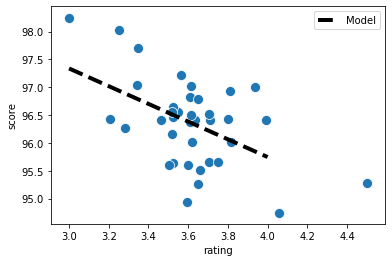

In [10]:
sns.scatterplot(x = 'rating', y = 'score', alpha = 1, data =df, s =100 )

xs = np.arange(df['rating'].min(), df['rating'].max())
ys = -1.5910*xs + 102.1105
plt.plot(xs, ys, '--k', linewidth=4, label='Model')
plt.xlabel('rating')
plt.ylabel('score')
plt.legend()

As the shape is clear, there's no positive correlation among score and rating. 
I'm going to explore the same analysis between score and median family income dollars.

In [11]:
outcome_2, predictors_2 = patsy.dmatrices('score ~ median_family_income_dollars', df)
mod_2 = sm.OLS(outcome_2, predictors_2)
res_2 = mod_2.fit()
print(res_2.summary())

                            OLS Regression Results                            
Dep. Variable:                  score   R-squared:                       0.006
Model:                            OLS   Adj. R-squared:                 -0.022
Method:                 Least Squares   F-statistic:                    0.2136
Date:                Wed, 10 Jun 2020   Prob (F-statistic):              0.647
Time:                        04:41:11   Log-Likelihood:                -42.650
No. Observations:                  37   AIC:                             89.30
Df Residuals:                      35   BIC:                             92.52
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Intercept       

What: The result turned out to be contradicting my initial assumption and it shows there's no relationship between score as outcome and median family income as predictor.

Why: Although my P-value is large enough (0.647), the coefficient indicates that there's a weak direct relationship between median family income and inspection score (close to 0). The R square seems to be smaller than what I expected (close to 0). 

More than that, the 2nd warning indicates that there is a risk of Multicollinearity which might cause my analysis not to be accurate.

How: But before I reject the null hypothesis, I'm going to draw visualization to see this relationship by my own eyes before making any judgement.

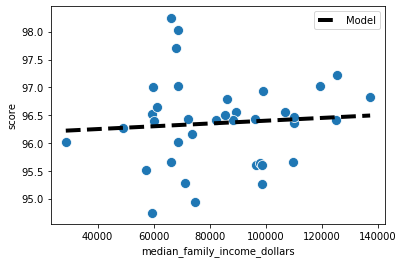

In [12]:
sns.scatterplot(x = 'median_family_income_dollars', y = 'score', alpha = 1, data =df, s =100 )

xs = np.arange(df['median_family_income_dollars'].min(), df['median_family_income_dollars'].max())
ys = 2.504e-06*xs + 96.1503
plt.plot(xs, ys, '--k', linewidth=4, label='Model')
plt.xlabel('median_family_income_dollars')
plt.ylabel('score')
plt.legend()

As the shape is clear, there's no strong correlation among score and median family income dollars. I'm going to explore the same analysis between score and median household income dollars.

In [13]:
outcome_3, predictors_3 = patsy.dmatrices('score ~ median_household_income_dollars', df)
mod_3 = sm.OLS(outcome_3, predictors_3)
res_3 = mod_3.fit()
print(res_3.summary())

                            OLS Regression Results                            
Dep. Variable:                  score   R-squared:                       0.008
Model:                            OLS   Adj. R-squared:                 -0.020
Method:                 Least Squares   F-statistic:                    0.2770
Date:                Wed, 10 Jun 2020   Prob (F-statistic):              0.602
Time:                        04:41:12   Log-Likelihood:                -42.617
No. Observations:                  37   AIC:                             89.23
Df Residuals:                      35   BIC:                             92.46
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Intercept 

What: The result turned out to be contradicting my initial assumption and it shows there's no relationship between score as outcome and median household income as predictor.

Why: Although my P-value is large enough (0.602), the coefficient indicates that there's a weak direct relationship between median family income and inspection score (close to 0). The R square seems to be smaller than what I expected (close to 0). 

More than that, the 2nd warning indicates that there is a risk of Multicollinearity which might cause my analysis not to be accurate.

How: But before I reject the null hypothesis, I'm going to draw visualization to see this relationship by my own eyes before making any judgement


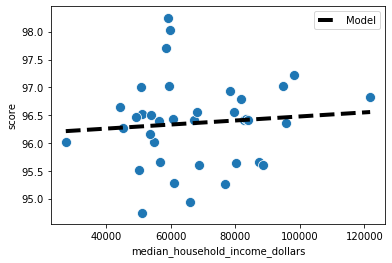

In [14]:
sns.scatterplot(x = 'median_household_income_dollars', y = 'score', alpha = 1, data =df, s =100 )

xs = np.arange(df['median_household_income_dollars'].min(), df['median_household_income_dollars'].max())
ys = 3.64e-06*xs + 96.1130
plt.plot(xs, ys, '--k', linewidth=4, label='Model')
plt.xlabel('median_household_income_dollars')
plt.ylabel('score')
plt.legend()

As the shape clear is, there's no positive correlation among score and household income dollars. I'm going to explore the same analysis between score and per capita income dollars.

In [15]:
outcome_4, predictors_4 = patsy.dmatrices('score ~ per_capita_income_dollars', df)
mod_4 = sm.OLS(outcome_4, predictors_4)
res_4 = mod_4.fit()
print(res_4.summary())

                            OLS Regression Results                            
Dep. Variable:                  score   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.029
Method:                 Least Squares   F-statistic:                  0.001103
Date:                Wed, 10 Jun 2020   Prob (F-statistic):              0.974
Time:                        04:41:12   Log-Likelihood:                -42.762
No. Observations:                  37   AIC:                             89.52
Df Residuals:                      35   BIC:                             92.75
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept             

What: The result turned out to be contradicting my initial assumption and it shows there's no relationship between score as outcome and per capita income as predictor.

Why: Although my P-value is large enough (0.947), the coefficient indicates that there's a weak (even negative) direct relationship between mper capita income and inspection score. The R square seems to be smaller than what I expected (close to 0). 

More than that, the 2nd warning indicates that there is a risk of Multicollinearity which might cause my analysis not to be accurate.

How: But before I reject the null hypothesis, I'm going to draw visualization to see this relationship by my own eyes before making any judgement.


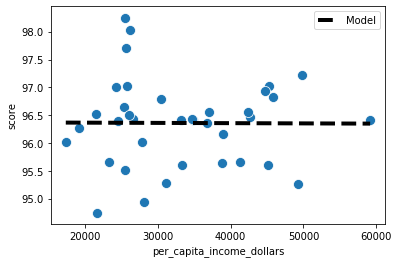

In [16]:
sns.scatterplot(x = 'per_capita_income_dollars', y = 'score', alpha = 1, data =df, s =100 )

xs = np.arange(df['per_capita_income_dollars'].min(), df['per_capita_income_dollars'].max())
ys = -4.378e-07*xs + 96.3743
plt.plot(xs, ys, '--k', linewidth=4, label='Model')
plt.xlabel('per_capita_income_dollars')
plt.ylabel('score')
plt.legend()

As the shape is clear, there's no positive correlation among score and per capita income dollars. I'm going to explore the same analysis between score and percent families below poverty line.

In [17]:
outcome_5, predictors_5 = patsy.dmatrices('score ~ percent_families_below_poverty_line', df)
mod_5 = sm.OLS(outcome_5, predictors_5)
res_5 = mod_5.fit()
print(res_5.summary())

                            OLS Regression Results                            
Dep. Variable:                  score   R-squared:                       0.019
Model:                            OLS   Adj. R-squared:                 -0.009
Method:                 Least Squares   F-statistic:                    0.6708
Date:                Wed, 10 Jun 2020   Prob (F-statistic):              0.418
Time:                        04:41:13   Log-Likelihood:                -42.411
No. Observations:                  37   AIC:                             88.82
Df Residuals:                      35   BIC:                             92.04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
In

What: The result turned out to be contradicting my initial assumption and it shows there's no relationship between score as outcome and percent families below poverty line as predictor.

Why: Although my P-value is large enough (0.418), the coefficient indicates that there's a weak direct relationship between percent families below poverty line and inspection score. The R square seems to be smaller than what I expected (close to 0).

How: But before I reject the null hypothesis, I'm going to draw visualizations to see this relationship by my own eyes before making any judgement


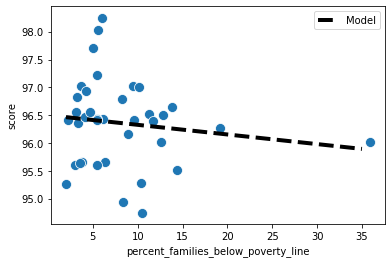

In [18]:
sns.scatterplot(x = 'percent_families_below_poverty_line', y = 'score', alpha = 1, data =df, s =100 )

xs = np.arange(df['percent_families_below_poverty_line'].min(), df['percent_families_below_poverty_line'].max())
ys = -0.0173*xs + 96.4995
plt.plot(xs, ys, '--k', linewidth=4, label='Model')
plt.xlabel('percent_families_below_poverty_line')
plt.ylabel('score')
plt.legend()

As the shape clear, there's no negative correlation among score and percent families below poverty line. I'm going to explore the same analysis between score and percent snap benefits.

In [19]:
outcome_6, predictors_6 = patsy.dmatrices('score ~ percent_snap_benefits', df)
mod_6 = sm.OLS(outcome_6, predictors_6)
res_6 = mod_6.fit()
print(res_6.summary())

                            OLS Regression Results                            
Dep. Variable:                  score   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                 -0.026
Method:                 Least Squares   F-statistic:                   0.07725
Date:                Wed, 10 Jun 2020   Prob (F-statistic):              0.783
Time:                        04:41:13   Log-Likelihood:                -42.722
No. Observations:                  37   AIC:                             89.44
Df Residuals:                      35   BIC:                             92.67
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                96.40

What: The result turned out to be contradicting my initial assumption and it shows there's no relationship between score as outcome and percent snap benefits as predictor.

Why: Although my P-value is large enough (0.783), the coefficient indicates that there's a weak direct relationship between percent snap benefits and inspection score. The R square seems to be smaller than what I expected (close to 0).

How: But before I reject the null hypothesis, I'm going to draw visualization to see this relationship by my own eyes before making any judgement

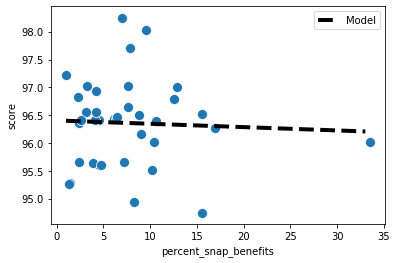

In [20]:
sns.scatterplot(x = 'percent_snap_benefits', y = 'score', alpha = 1, data =df, s =100 )

xs = np.arange(df['percent_snap_benefits'].min(), df['percent_snap_benefits'].max())
ys = -0.0060*xs + 96.4056
plt.plot(xs, ys, '--k', linewidth=4, label='Model')
plt.xlabel('percent_snap_benefits')
plt.ylabel('score')
plt.legend()

As the shape is clear, there's no negative correlation among score and percent snap benefits. I'm going to explore the same analysis between score and percent supplemental security income.

In [21]:
outcome_7, predictors_7 = patsy.dmatrices('score ~ percent_supplemental_security_income', df)
mod_7 = sm.OLS(outcome_7, predictors_7)
res_7 = mod_7.fit()
print(res_7.summary())

                            OLS Regression Results                            
Dep. Variable:                  score   R-squared:                       0.026
Model:                            OLS   Adj. R-squared:                 -0.002
Method:                 Least Squares   F-statistic:                    0.9172
Date:                Wed, 10 Jun 2020   Prob (F-statistic):              0.345
Time:                        04:41:14   Log-Likelihood:                -42.284
No. Observations:                  37   AIC:                             88.57
Df Residuals:                      35   BIC:                             91.79
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                                           coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------


What: The result turned out to be contradicting my initial assumption and it shows there's no relationship between score as outcome and percent supplemental security income as predictor.

Why: Although my P-value is large enough (0.345), the coefficient indicates that there's a weak (and even negative) direct relationship between percent supplemental security income and inspection score. The R square seems to be smaller than what I expected (close to 0). 

How: But before I reject the null hypothesis, I'm going to draw visualization to see this relationship by my own eyes before making any judgement


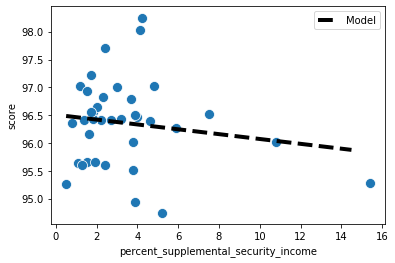

In [22]:
sns.scatterplot(x = 'percent_supplemental_security_income', y = 'score', alpha = 1, data =df, s =100 )

xs = np.arange(df['percent_supplemental_security_income'].min(), df['percent_supplemental_security_income'].max())
ys = -0.0435*xs + 96.5073
plt.plot(xs, ys, '--k', linewidth=4, label='Model')
plt.xlabel('percent_supplemental_security_income')
plt.ylabel('score')
plt.legend()

As the shape clear, there's no positive correlation among score and percent supplemental security income. 

This is very critical because none of my (assumed) predictors had any effect over my outcome (score). 
Maybe my first source (https://pubmed.ncbi.nlm.nih.gov/27348977/ ) is not accurate by saying that there is correlation between food inspection and Yelp review.
One thing to check is to find the correlation among various variables and see which ones are more correlated and go beyond 'score' as my only outcome

In [23]:
df.corr()

,score,rating,median_family_income_dollars,median_household_income_dollars,per_capita_income_dollars,percent_families_below_poverty_line,percent_snap_benefits,percent_supplemental_security_income
score,1.000000,-0.527777,0.077888,0.088614,-0.005612,-0.137131,-0.046930,-0.159806
rating,-0.527777,1.000000,0.063249,0.054720,0.142682,0.122089,0.007134,0.438612
median_family_income_dollars,0.077888,0.063249,1.000000,0.880112,0.901717,-0.718478,-0.756979,-0.522938
median_household_income_dollars,0.088614,0.054720,0.880112,1.000000,0.720754,-0.691265,-0.696365,-0.479769
per_capita_income_dollars,-0.005612,0.142682,0.901717,0.720754,1.000000,-0.612539,-0.696073,-0.475189
percent_families_below_poverty_line,-0.137131,0.122089,-0.718478,-0.691265,-0.612539,1.000000,0.877161,0.621459
percent_snap_benefits,-0.046930,0.007134,-0.756979,-0.696365,-0.696073,0.877161,1.000000,0.502475
percent_supplemental_security_income,-0.159806,0.438612,-0.522938,-0.479769,-0.475189,0.621459,0.502475,1.000000


So far, I rejected the null hypothesis and found out that the inspection score has nothing to do with yelp rating or economic matters of a neighborhood. It seems that my data shows a slight correlation among rating and per_capita_income_dollars, percent_supplemental_security_income, and percent_families_below_poverty_line. This is a contradiction to my second source,https://medium.com/swlh/is-there-a-correlation-between-a-restaurants-ratings-and-the-income-levels-of-a-neighborhood-5fe41165e4f1, which already assessed that there is no correlation between Yelp ratings and financial demography of a neighborhood. I'm going to assess that if the author is wrong (reject the null hypothesis and assess that Yelp rating is an outcome).

Please note that I'm also considering the relation between Yelp rating and percent families below poverty line too; they have positive, though small, correlation. There might be the case that rating in poor neighborhoods is higher. However, my job in here is not to assess which direction this correlation tilts, but rather to assess if I should reject the second article's claim, that rating is a predictor, not an outcome, and also see if it has any correlation with financial status in a zip code or not. If there was a correlation, then I can decided to take my analysis into which next level.

In [24]:
outcome_8, predictors_8 = patsy.dmatrices('rating ~ percent_supplemental_security_income', df)
mod_8 = sm.OLS(outcome_8, predictors_8)
res_8 = mod_8.fit()
print(res_8.summary())

                            OLS Regression Results                            
Dep. Variable:                 rating   R-squared:                       0.192
Model:                            OLS   Adj. R-squared:                  0.169
Method:                 Least Squares   F-statistic:                     8.337
Date:                Wed, 10 Jun 2020   Prob (F-statistic):            0.00662
Time:                        04:41:14   Log-Likelihood:                 2.0166
No. Observations:                  37   AIC:                          -0.03325
Df Residuals:                      35   BIC:                             3.189
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                                           coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------


What: The result turned out to be contradicting my second assumption and it shows there's no relationship between rating as outcome and percent supplemental security income as predictor.

Why: Not only my P-value is small (close to 0), the coefficient indicates that there's a weak direct relationship between percent supplemental security income and rating. The R square seems to be smaller than I expected though not 0. 

How: But before I reject the null hypothesis, I'm going to draw visualization to see this relationship by my own eyes before making any judgement


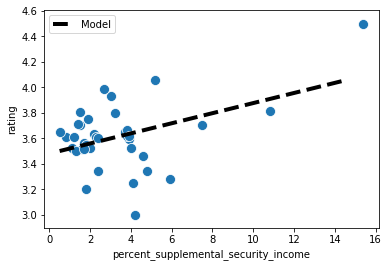

In [25]:
sns.scatterplot(x = 'percent_supplemental_security_income', y = 'rating', alpha = 1, data =df, s =100 )

xs = np.arange(df['percent_supplemental_security_income'].min(), df['percent_supplemental_security_income'].max())
ys = 0.0396*xs + 3.4803
plt.plot(xs, ys, '--k', linewidth=4, label='Model')
plt.xlabel('percent_supplemental_security_income')
plt.ylabel('rating')
plt.legend()

As the shape is clear, there's no positive correlation between rating and percent supplemental security income. I'm going to explore the same analysis between rating and per capita income dollars.

In [26]:
outcome_9, predictors_9 = patsy.dmatrices('rating ~ per_capita_income_dollars', df)
mod_9 = sm.OLS(outcome_9, predictors_9)
res_9 = mod_9.fit()
print(res_9.summary())

                            OLS Regression Results                            
Dep. Variable:                 rating   R-squared:                       0.020
Model:                            OLS   Adj. R-squared:                 -0.008
Method:                 Least Squares   F-statistic:                    0.7273
Date:                Wed, 10 Jun 2020   Prob (F-statistic):              0.400
Time:                        04:41:15   Log-Likelihood:                -1.5557
No. Observations:                  37   AIC:                             7.111
Df Residuals:                      35   BIC:                             10.33
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept             

What: The result turned out to be contradicting my second assumption and it shows there's no relationship between rating as outcome and per capita income dollars as predictor.

Why: Although my P-value is large enough (0.4), the coefficient indicates that there's a weak direct relationship between per capita income dollars and rating. The R square seems to be smaller than I expected (close to 0). 

More than that, the 2nd warning indicates that there is a risk of Multicollinearity which might cause my analysis not to be accurate.

How: But before I reject the null hypothesis, I'm going to draw visualization to see this relationship by my own eyes before making any judgement

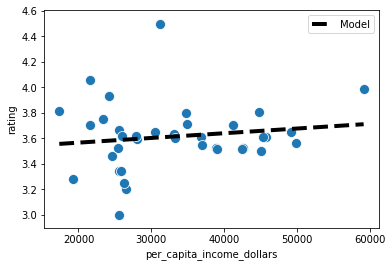

In [27]:
sns.scatterplot(x = 'per_capita_income_dollars', y = 'rating', alpha = 1, data =df, s =100 )

xs = np.arange(df['per_capita_income_dollars'].min(), df['per_capita_income_dollars'].max())
ys = 3.692e-06*xs + 3.4920
plt.plot(xs, ys, '--k', linewidth=4, label='Model')
plt.xlabel('per_capita_income_dollars')
plt.ylabel('rating')
plt.legend()

As the shape is clear, there's no positive correlation between rating and per capita income dollars. I'm going to explore the same analysis between rating and percent families below poverty line.

In [28]:
outcome_10, predictors_10 = patsy.dmatrices('rating ~ percent_families_below_poverty_line', df)
mod_10 = sm.OLS(outcome_10, predictors_10)
res_10 = mod_10.fit()
print(res_10.summary())

                            OLS Regression Results                            
Dep. Variable:                 rating   R-squared:                       0.015
Model:                            OLS   Adj. R-squared:                 -0.013
Method:                 Least Squares   F-statistic:                    0.5296
Date:                Wed, 10 Jun 2020   Prob (F-statistic):              0.472
Time:                        04:41:15   Log-Likelihood:                -1.6583
No. Observations:                  37   AIC:                             7.317
Df Residuals:                      35   BIC:                             10.54
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
In

What: The result turned out to be contradicting my second assumption and it shows there's no relationship between rating as outcome and percent families below poverty line as predictor.

Why: Although my P-value is small (close to 0), the coefficient indicates that there's a weak direct (but positive) relationship between percent families below poverty line and rating. The R square seems to be smaller than I expected (close to 0). 

How: But before I reject the null hypothesis, I'm going to draw visualization to see this relationship by my own eyes before making any judgement

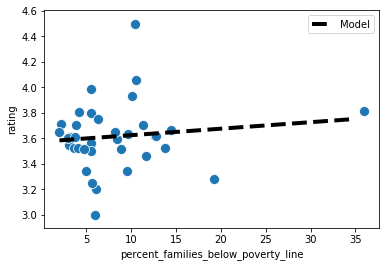

In [29]:
sns.scatterplot(x = 'percent_families_below_poverty_line', y = 'rating', alpha = 1, data =df, s =100 )

xs = np.arange(df['percent_families_below_poverty_line'].min(), df['percent_families_below_poverty_line'].max())
ys = 0.0051*xs + 3.5734
plt.plot(xs, ys, '--k', linewidth=4, label='Model')
plt.xlabel('percent_families_below_poverty_line')
plt.ylabel('rating')
plt.legend()

As the shape is clear, there's no positive correlation between rating and percent families below poverty line. 

Based on my findings, I can assess that Yelp rating has no strong correlation with financial demography of a neighborhood, i.e., my second source is correct

# Ethics & Privacy

In all data that I used, I made sure that there's no person's name (including owners and inspectors), address, phone, or any other sensitive information that might be misused by others when they take this analysis into account in the future. The data itself were mainly gathered by local city government so it should be noted that all numbers, analysis, and visualizations have solid background with maximum transparency. 

My most important ethical concern was because of possible unintentional consequences that all were started by asking the original question of this project and continued straight right into possible findings. If my null hypothesis was confirmed, on one hand, this project might have had discouraged those food business owners to who wanted to open their stores in relatively less well off neighborhoods, so they would scale down; the reason is because the owners will see that their businesses will not be successful and survive from negative food inspection scores, which resulted from low revenue, and they might feel that they are trapped in an endless negative cycle. On the other hand, this unintended consequence could have had made local owners to give up on their endeavor and/or close their restuarants permenantly in order to go somewhere else.

Of course in my opinion the benefits of having this question asked weigh heavier than not asking it because then the City Hall officials might also see this as a form of income segregation and work harder to ensure restaurants in low income areas have the same amenities and service levels as those in middle or high income areas. So at the end of the day, I believe asking the right question will (probably) help those food shop owners who are in a disadvantaged position

# Conclusion & Discussion

I began my analysis by asking if there is a correlation between food inspection score as an outcome, and financial matters of a neighborhood and Yelp rating as predictors. The initial assumption was that the more rating a business can get from its customers alongside the proximity of that business in well off neighborhoods, the owner(s) can boost the restaurant's revenue and the restaurant has more resources to take care of its quality including sanitation, customer service, food checks, and etc. My analysis showed that the income of a neighborhood and Yelp ratings of its restaurants have nothing to do with the food inspection score. High income neighborhoods and/or high rating restaurants can have poorly inspection scores and low income neighborhood and/or low Yelp reviews can have high score restaurants.
I used single linear regression among each variables in the predictor group and food inspection score as my outcome. In some cases, I found the P-values larger than 0.05 while coefficients were negligible and close to 0 alongside R-squares to be very small. In other cases P-Values were very close to zero, resulting into rejecting my null hypothesis. 
Then I questioned the nature and credibility of my sources and prior works. For example, my finding showed a small correlation between Yelp reviews and some of financial predictors based on corr() method, in which one of my sources claimed that Yelp reviews had no relation with the economic demography of a neighborhood. So I went beyond on to see if the ratings are the outcome themselves, and then build my analysis based on the correlation between Yelp reviews and financial predictors. Again, based on linear regression, my analysis showed there is't a strong correlation between ratings and other financial predictors and my second source is correct. So at the end, I rejected my null hypothesis and I concluded there isn't a correlation between food inspection score with ratings and financial predictors, (and there is no correlation between ratings and financial matters). 

I think there were some limitations within my data set; particularly, I assessed the data only in 1 state, North Carolina, which the racial demography might not represent the whole United States. It was better if I had another data sets like the violations by each restaurant's zip code (I had this data set but I was unable to extract the zip codes because there was no indication of it in this data set). Considering the Yelp review data, If I wanted to include counts of reviews in each restaurant, it would be more effective to try and use sentiment analysis to calculate the rating of a restaurant. This would involve analysing the text of the reviews to see if we can use that to calculate the rating a user would give a restaurant. The last topic that I like point out is the impact of this analysis on society. If this analysis confirmed my null hypothesis, it was up to local and federal governments, social workers and NGOs, restaurant owners, and above all citizens to decide on what to take with these findings in order to make sure that all food business owners have the necessary resources to not only survive, but also they are treated based on equity rather than equality. There could have been some hot arguments on income segregation and how the environment is affecting all people more than the way individuals have impacts on their own lives.